In [1]:
%load_ext autoreload
%autoreload 2

import os,sys
import skimage.io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from skimage.measure import regionprops
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from skimage.morphology import reconstruction, thin, skeletonize, medial_axis

In [3]:
img_dir = "./panda-64x256x256-tiles-data-spine-medreso/train"
csv_file = "./prostate-cancer-grade-assessment/train.csv"
df = pd.read_csv(csv_file)
names = df['image_id'].tolist()
# names = [name for name in os.listdir(img_dir) if "train" not in name]

In [12]:
checkpic = {}
for name in tqdm(names):
    count  = 0
    for i in range(36):
        file_name = name + "_{}.png".format(i)
        img = Image.open(os.path.join(img_dir, file_name)).convert('RGB')
        img = np.asarray(img)
        if np.all(img==255):
            count += 1
    checkpic[name] = count

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [17]:
temp = df.set_index('image_id')
count = 0
count_rad = 0
count_kar = 0
for key in checkpic:
    count += checkpic[key]
    if temp.loc[key, 'data_provider'] == "radboud":
        count_rad += checkpic[key]
    else:
        count_kar += checkpic[key]

In [21]:
(1 - count / (36 * 10616)) * 36

32.9673134890731

In [23]:
count_rad/count, count_kar/count

(0.8405963658953254, 0.15940363410467465)

In [ ]:
for name in tqdm(names[348930:]):
    if ".png" not in name:
        continue
    img = Image.open(os.path.join(img_dir, name)).convert('RGB')
    img = np.asarray(img)
    if np.sum(img) == 0:
        print(name)
        break
        img = 255 * np.ones_like(img).astype(np.uint8)
        im = Image.fromarray(img)
        im.save(os.path.join(img_dir, name))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


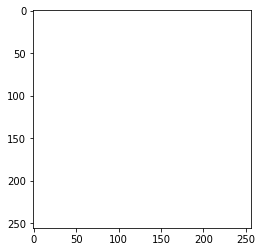

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(img)
plt.show()